# Importing

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pickle

import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer, SnowballStemmer
from nltk.tokenize import word_tokenize
import string
import os
from sklearn.tree import DecisionTreeClassifier
# from sklearn.metrics import mean_squared_error
# from sklearn.neighbors import KNeighborsClassifier

In [2]:
# # Define preprocessing functions
# nltk.download('stopwords')
# nltk.download('punkt')
# nltk.download('wordnet')
# nltk.download('averaged_perceptron_tagger')

# Helper Functions

In [3]:
def execute_model(model, model_name, X_train, Y_train, X_test, Y_test):
    model.fit(X_train, Y_train)

    Y_train_pred = model.predict(X_train)

    print(f"{model_name}:")
    # train_mse = mean_squared_error(Y_train, Y_train_pred)
    # print(f"{model_name}:\n Training MSE: {train_mse}")
    train_accuracy = accuracy_score(Y_train, Y_train_pred)
    print(f"Train Accuracy: {train_accuracy}")

    Y_test_pred = model.predict(X_test)

    # test_mse = mean_squared_error(Y_test, Y_test_pred)
    # print(f" Testing MSE: {test_mse}")
    test_accuracy = accuracy_score(Y_test, Y_test_pred)
    print(f"Test Accuracy: {test_accuracy}")

    draw(Y_test, Y_test_pred, model_name)

In [4]:
def draw(Y, Y_pred, model_name):
    print(classification_report(Y, Y_pred))
    # Confusion matrix
    conf_mat = confusion_matrix(Y, Y_pred)
    plt.imshow(conf_mat, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(model_name)
    plt.colorbar()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.xticks(np.arange(20), set(Y), rotation=90)
    plt.yticks(np.arange(20), set(Y))
    plt.show()

In [5]:
def read_data(train_folder_path):
    X = []
    Y = []

    for class_name in os.listdir(train_folder_path):
        class_folder_path = f"{train_folder_path}/{class_name}"
        for txt_file in os.listdir(class_folder_path):
            Y.append(class_name)
            txt_file_path = f"{class_folder_path}/{txt_file}"
            X.append(open(txt_file_path, 'r').read())

    return X, Y

# Preprocessing

In [6]:
stop_words = set(stopwords.words('english'))
stemmer = SnowballStemmer('english')
lemmatizer = WordNetLemmatizer()

In [7]:
def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text.lower())
    tokens = [token for token in tokens if token not in string.punctuation and token not in stop_words]
    
    
    # # Lemmatization
    # tagged_tokens = nltk.pos_tag(tokens)
    # lemmatized_tokens = []
    # for word, tag in tagged_tokens:
    #     if tag.startswith('NN'):  # Nouns
    #         lemma = lemmatizer.lemmatize(word, pos='n')
    #     elif tag.startswith('VB'):  # Verbs
    #         lemma = lemmatizer.lemmatize(word, pos='v')
    #     elif tag.startswith('JJ'):  # Adjectives
    #         lemma = lemmatizer.lemmatize(word, pos='a')
    #     else:
    #         lemma = lemmatizer.lemmatize(word)
    #     lemmatized_tokens.append(lemma)
    # # Join lemmatized tokens into a string for stemming
    # lemmatized_text = ' '.join(lemmatized_tokens)
    # # Stemming
    # stemmed_text = stemmer.stem(lemmatized_text)

    # Stemming and lemmatization
    # stemmed_tokens = [stemmer.stem(lemmatizer.lemmatize(token)) for token in tokens]

    # Stemming only 
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    
    
    # Joining tokens back to text
    cleaned_text = ' '.join(stemmed_tokens)
    
    return cleaned_text

In [18]:
test_folder_path = r'20news-18828'
X, Y = read_data(test_folder_path)

In [19]:
from sklearn.model_selection import train_test_split

train_news, test_news, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=70)

In [20]:
train_news_preprocessed = [preprocess_text(cleaned_text) for cleaned_text in train_news]

In [21]:
test_news_preprocessed = [preprocess_text(cleaned_text) for cleaned_text in test_news]

## Feature Extraction

### TF-IDF

In [22]:
# Compute TF-IDF for training and test data
vectorizer = TfidfVectorizer()
vectorizer.fit(train_news_preprocessed)

TfidfVectorizer()

In [23]:
X_train = vectorizer.transform(train_news_preprocessed)
X_test = vectorizer.transform(test_news_preprocessed)

# Models

## Naive Bayes

Naive Bayes:
Train Accuracy: 0.936927366883548
Test Accuracy: 0.8762612851832182
                          precision    recall  f1-score   support

             alt.atheism       0.91      0.79      0.84       172
           comp.graphics       0.88      0.81      0.84       200
 comp.os.ms-windows.misc       0.82      0.86      0.84       182
comp.sys.ibm.pc.hardware       0.77      0.85      0.81       208
   comp.sys.mac.hardware       0.93      0.88      0.90       198
          comp.windows.x       0.91      0.87      0.89       191
            misc.forsale       0.93      0.71      0.81       204
               rec.autos       0.86      0.95      0.91       186
         rec.motorcycles       0.98      0.96      0.97       213
      rec.sport.baseball       0.96      0.95      0.95       191
        rec.sport.hockey       0.96      0.99      0.97       196
               sci.crypt       0.90      0.98      0.94       214
         sci.electronics       0.86      0.87      0.87     

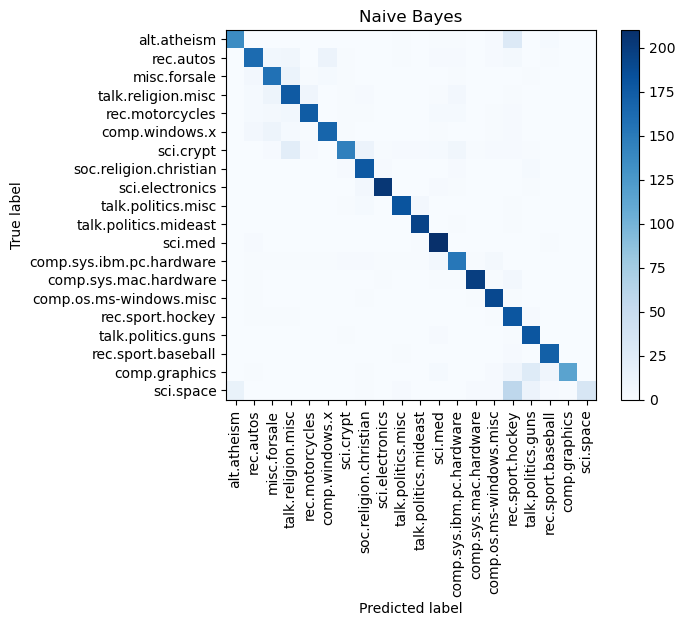

In [24]:
naive_bayes_model = MultinomialNB()
execute_model(naive_bayes_model, "Naive Bayes", X_train, Y_train, X_test, Y_test)

# pickle.dump(clf, open("naive_bayes_model.nlp", 'wb'))

## Decision Tree

In [25]:
# decision_tree_model = DecisionTreeClassifier(max_depth=100)
# execute_model(decision_tree_model, "Decision Tree Classifier", X_train, Y_train, X_test, Y_test) 